In [19]:
library(ggplot2)
library(ggthemes)
library(dplyr)

In [1]:
df_pcs = read.csv("/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_tsne.csv", row.names=1)

In [2]:
head(df_pcs)

,tSNE1,tSNE2,condition
HPSI0714i-iudw_1--DA--d30--0,-13.7566906,32.71191,d30
HPSI0714i-iudw_1--DA--d30--1,4.6202919,31.43719,d30
HPSI0714i-iudw_1--DA--d30--2,-0.2728905,38.26676,d30
HPSI0714i-iudw_1--DA--d30--3,-8.2737582,33.39863,d30
HPSI0714i-iudw_1--DA--d30--4,29.7120934,20.15199,d30
HPSI0714i-iudw_1--DA--d30--5,18.9223039,16.77345,d30


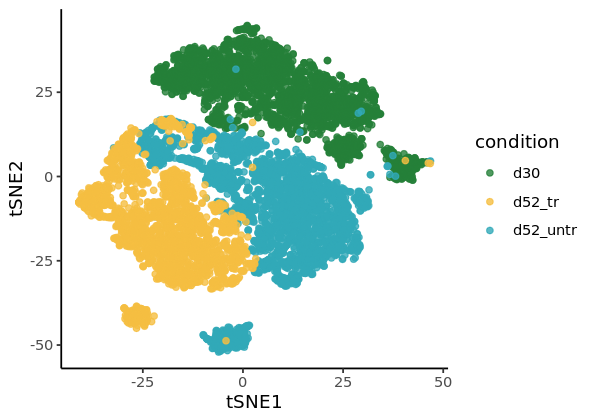

In [60]:
options(repr.plot.width = 5, repr.plot.height = 3.5)
p = ggplot(df_pcs, aes(x=tSNE1, y = tSNE2, colour = condition)) + geom_point(alpha = 0.8) 
p + scale_color_canva(palette = "Cheerful brights") + theme_classic()

In [23]:
filename = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/REVISION/18clusters.csv"
df0 = read.csv(filename, row.names=1)
head(df0,2)

,cell,cluster
0,HPSI0714i-iudw_1--DA--d30--0,2
1,HPSI0714i-iudw_1--DA--d30--1,2


In [24]:
df_pcs$cell = rownames(df_pcs)
df1 = inner_join(df_pcs, df0)

Joining, by = "cell"


In [25]:
filename = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/REVISION/9clusters.csv"
df2 = read.csv(filename, row.names=1)
head(df2,2)

,cell,cluster
0,HPSI0714i-iudw_1--DA--d30--0,0
1,HPSI0714i-iudw_1--DA--d30--1,0


In [27]:
df3 = inner_join(df1,df2, by="cell",suffix=c("18","9"))
head(df3,2)

tSNE1,tSNE2,condition,cell,cluster18,cluster9
-13.756691,32.71191,d30,HPSI0714i-iudw_1--DA--d30--0,2,0
4.620292,31.43719,d30,HPSI0714i-iudw_1--DA--d30--1,2,0


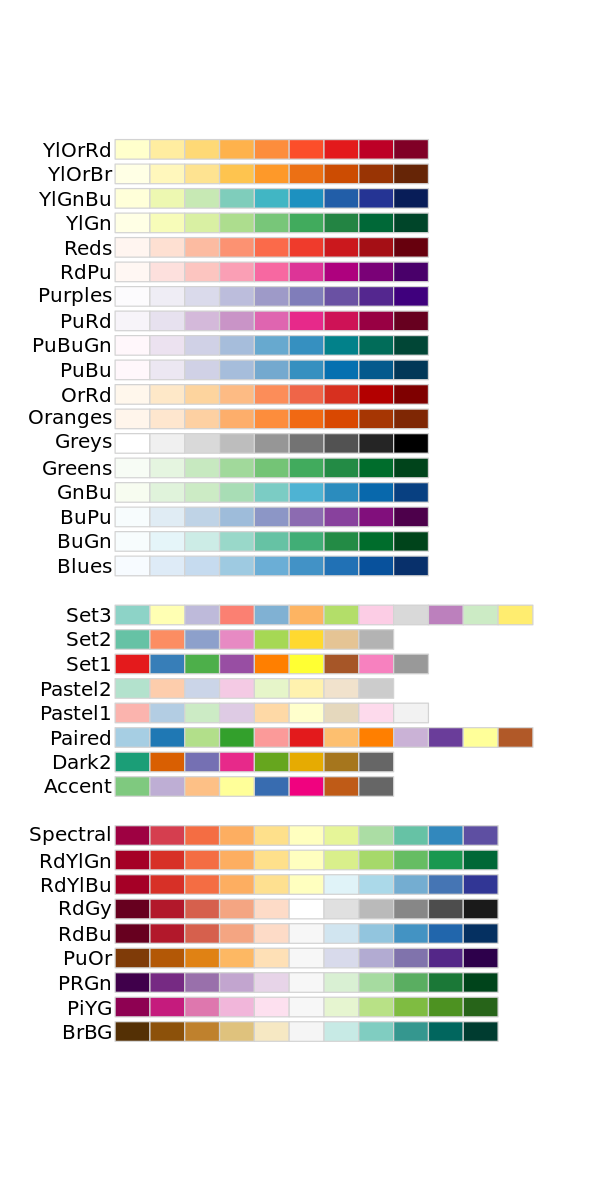

In [36]:
library(RColorBrewer)
options(repr.plot.width = 5, repr.plot.height = 10)
RColorBrewer::display.brewer.all()

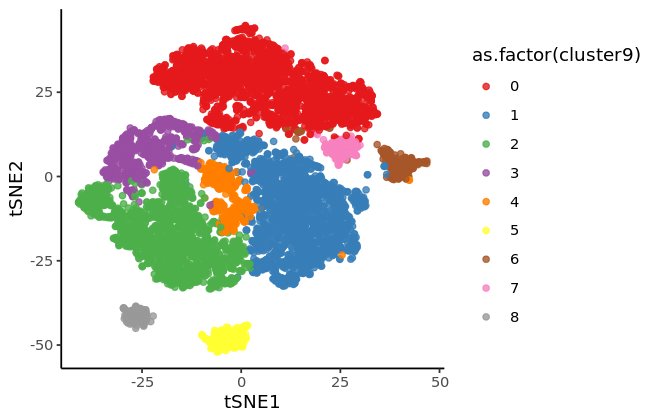

In [61]:
options(repr.plot.width = 5.5, repr.plot.height = 3.5)
p = ggplot(df3, aes(x=tSNE1, y = tSNE2, colour = as.factor(cluster9))) + geom_point(alpha = 0.8) 
p + theme_classic() + scale_colour_brewer(palette = "Set1")

In [58]:
colourCount = length(unique(df3$cluster18))
getPalette = colorRampPalette(brewer.pal(9, "Set1"))

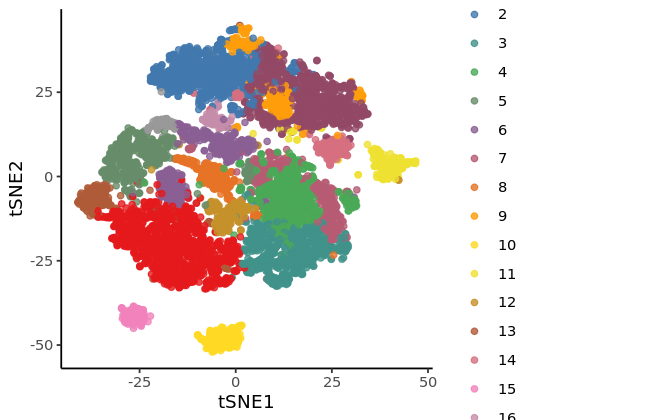

In [62]:
p = ggplot(df3, aes(x=tSNE1, y = tSNE2, colour = as.factor(cluster18))) + geom_point(alpha = 0.8) 
p + theme_classic() + scale_colour_manual(values = getPalette(colourCount))